# wordcloud

## Requires software

```
conda activate ao3-tagging
conda install wordcloud
```


## References

### Basics of pandas and wordcloud

https://thecleverprogrammer.com/2021/11/11/word-cloud-from-a-pandas-dataframe-in-python/

https://www.kaggle.com/code/mchirico/quick-look-seaborn-wordcloud

https://jingwen-z.github.io/data-viz-with-matplotlib-series9-word-cloud/

### Advanced formatting

https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f

### Advanced manipulation of the input text

This approach is interesting as it computes two metrics, _term frequency_ (most popular) and _inverse document frequency_ (most unique), then combines them into a single metric indcating the importance of the word to understanding the document. The combined metric "TF-IDF" is a score for the word across all the documents:


> _tf_idf_ = { _tf_ } x { _idf_ }

> _tf_idf_ = {_frequency of word in document_ ÷ _words in document_} x {log(_number of documents in corpus_ ÷ _number of documents containing word_)}

We could treat all freeforms tags as the 'corpus', a freeform tag as the 'document'.

https://towardsdatascience.com/tf-idf-a-visual-explainer-and-python-implementation-on-presidential-inauguration-speeches-2a7671168550

In [1]:
import pandas as pd
import wordcloud as wc
import matplotlib.pyplot as plt
import re

import ds9
df = ds9.df()

In [2]:
# Extend wordcloud's stop-word set with DS9 title and some words they missed.
ds9stopwords = {
    'around',
    'deep',     # name of TV series
    'ds9',      # name of TV series
    'even',
    'gets',
    'isn',      # isn't becomes isn t
    'go',
    'nine',     # name of TV series
    're',       # you're becomes you re
    'really',
    's',        # your's becomes your s
    'say',
    'set',
    'someone',
    'space',    # name of TV series
    'star',     # name of TV series
    'station',
    'story',
    't',        # isn't becomes isn t
    'trek',     # name of TV series
    'way',
    'will' }

stopwords = set(wc.STOPWORDS).union(ds9stopwords)

In [3]:
# The usual wordcloud output uses colours, but that doesn't seem
# as effective a monotone or grayscale.
#
# A nice HSL colour calculator: https://www.w3schools.com/colors/colors_hsl.asp

def grayscale_color_func(word,
                         font_size,
                         position,
                         orientation,
                         random_state=None,
                         **kwargs):

    # Start from 20% Lightness then add up to 30% depending on font size
    gray_percent =  round((((40 - font_size) / 40) * 30) + 20)
    gray_hsl = 'hsl(200, 30%, {}%)'.format(gray_percent)
    return(gray_hsl)

def black_color_func(word,
                     font_size,
                     position,
                     orientation,
                     random_state=None,
                     **kwargs):
    return('hsl(0, 100%, 1%)')

In [4]:
# Clean a string so it works better in a wordcloud
#   - remove punctuation
#   - convert it to lower case so frequencies are not halved
def cleaner(s):
    r = re.sub(r'[^\w\s]', ' ', s)
    r = r.lower()
    return r

# Return a list of cleaned-up words from a column of a dataframe.
def dfwords(df, column):
    words = ''
    for s in df[column]:
        words += ' ' + cleaner(str(s))
    return words

## freeforms - free-form tags describing a work

In [5]:
edf = ds9.keepcolumns(df, 'freeforms')
edf = ds9.explode(edf, 'freeforms')
words = dfwords(edf, 'freeforms')

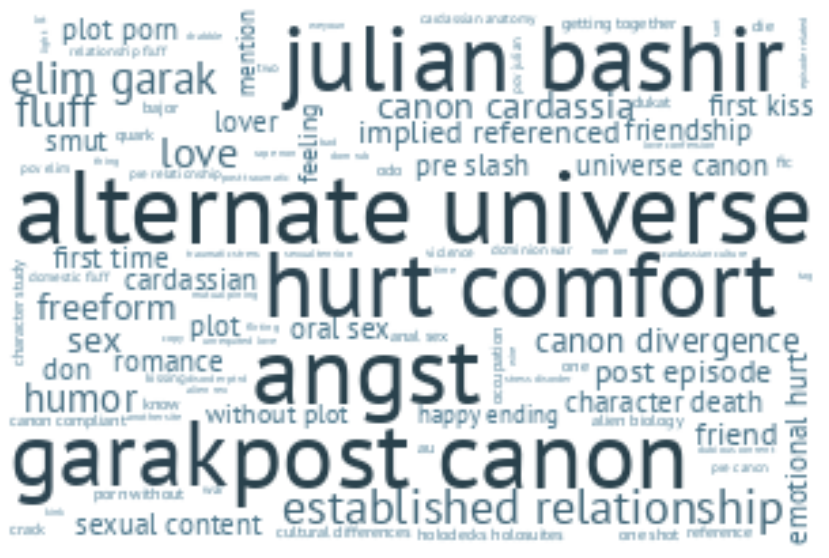

In [6]:
wordcloud = wc.WordCloud(background_color='white',
                         stopwords=stopwords,
                         max_font_size=40,
                         width=300, height=200, max_words=500,
                         font_path = '../../misc/fonts/pt-sans/PTS55F.ttf').generate(words)

wordcloud.recolor(color_func = grayscale_color_func)
plt.figure(figsize=(15,10)),
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud-freeforms.png')
plt.savefig('wordcloud-freeforms.svg')
plt.show()

## summary - blurb for the work

In [7]:
words = dfwords(df, 'summary')

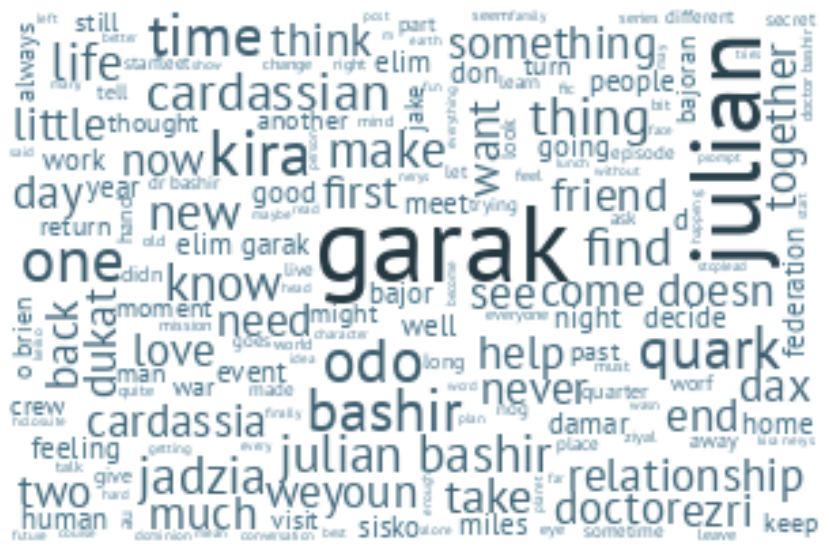

In [8]:
wordcloud = wc.WordCloud(background_color='white',
                         stopwords=stopwords,
                         max_font_size=40,
                         width=300, height=200, max_words=500,
                         font_path = '../../misc/fonts/pt-sans/PTS55F.ttf').generate(words)

wordcloud.recolor(color_func = grayscale_color_func)
plt.figure(figsize=(15,10)),
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud-summary.png')
plt.savefig('wordcloud-summary.svg')
plt.show()